In [14]:
# Read in necessary libraries
import pandas as pd
import altair as alt
import datetime as dt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [15]:
# Read in percipitation_bra data <https://data.humdata.org/dataset/daily-summaries-of-precipitation-indicators-for-brazil>
# contains percipitation from December 23, 2015-December 23, 2015
percip_brazil = pd.read_csv("precipitation_bra.csv")

# Examine the dataset
percip_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       16000 non-null  object
 1   datatype   16000 non-null  object
 2   station    16000 non-null  object
 3   value      16000 non-null  int64 
 4   fl_miss    16000 non-null  int64 
 5   fl_cmiss   16000 non-null  int64 
 6   country    16000 non-null  object
 7   indicator  16000 non-null  object
dtypes: int64(3), object(5)
memory usage: 1000.1+ KB


In [16]:
# Change column from dtype object to datetime
percip_brazil['date'] =  pd.to_datetime(percip_brazil['date'], infer_datetime_format=True)

# Split date column into day, month, year
percip_brazil['day'] = percip_brazil['date'].dt.day
percip_brazil['month'] = percip_brazil['date'].dt.month
percip_brazil['year'] = percip_brazil['date'].dt.year

percip_brazil.head()

,date,datatype,station,value,fl_miss,fl_cmiss,country,indicator,day,month,year
0,2010-01-01,TPCP,GHCND:BR000352000,3397,0,0,Brazil,TPCP,1,1,2010
1,2010-01-01,TPCP,GHCND:BR000956000,2979,0,0,Brazil,TPCP,1,1,2010
2,2010-01-01,TPCP,GHCND:BR002143012,2724,0,0,Brazil,TPCP,1,1,2010
3,2010-01-01,TPCP,GHCND:BR00E3-0520,5750,0,0,Brazil,TPCP,1,1,2010
4,2010-01-01,TPCP,GHCND:BR037041370,1670,0,0,Brazil,TPCP,1,1,2010


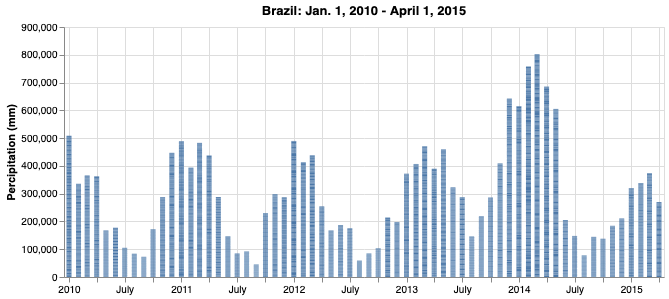

In [17]:
# Create a plot of percipitation vs date
percip = (
    alt.Chart(percip_brazil)
    .mark_bar()
    .encode(
        alt.X('date', title=None),
        alt.Y('value', title ='Percipitation (mm)'),
    ).properties(title= "Brazil: Jan. 1, 2010 - April 1, 2015", width=600, height=250)
)
percip